**Implementing a pseudo-random number generator (PRNG)** - An algorithm that generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ represents the next pseudo-random number in the sequence.
- $X_n$ is the current pseudo-random number in the sequence.
- $a$ is the multiplier, which determines the overall distribution and period of the generated sequence.
- $c$ is the increment, which shifts the generated sequence.
- $m$ is the modulus, which determines the range of values that the generated numbers can take.



In [29]:
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
import hamiltorch
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


In [30]:
n_samples=10000
seed=42
p=0.4

In [31]:
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers


Plot histogram

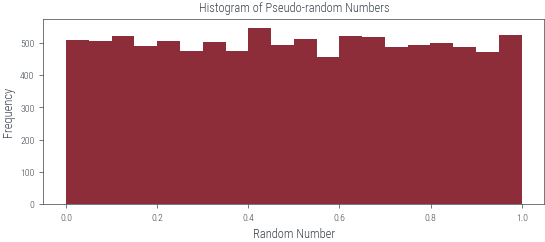

In [32]:

# Example usage:
random_numbers = lcg(seed, n_samples )

plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

**Using PyTorch**

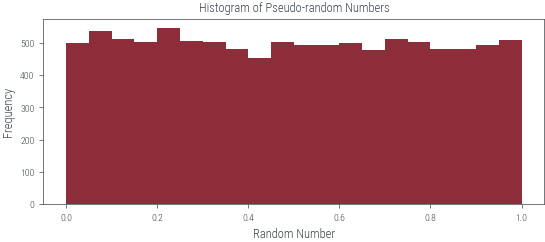

In [22]:

# Generate random numbers using PyTorch distribution
distribution = torch.distributions.Uniform(0, 1)
random_numbers = distribution.sample((n_samples,))

# Plot the histogram
plt.hist(random_numbers.numpy(), bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

Convert **Unifom Sampling** to **Bernoulli Sampling**  

we can use the probablity $(p)$ of outcome 1 and $(1-p)$ of outcome 0

In [35]:

def uniform_to_bernoulli(seed, n_samples, p):
    """
    Generates a sequence of pseudo-random numbers from a uniform distribution and converts them to a Bernoulli distribution.

    Args:
        seed (int): The seed value for the random number generator.
        n_samples (int): The number of random numbers to generate.
        p (float): The probability of generating a 1 in the Bernoulli distribution.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the Bernoulli distribution.
    """
    torch.manual_seed(seed)
    bernoulli_dist = dist.bernoulli.Bernoulli(probs=p)
    bernoulli_samples = bernoulli_dist.sample((n_samples,))
    bernoulli_numbers = bernoulli_samples.int()

    return bernoulli_numbers





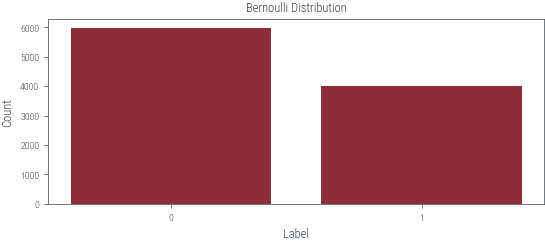

In [34]:
random_numbers = uniform_to_bernoulli(seed, n_samples, p)

# Count the occurrences of each category
category_counts = torch.bincount(random_numbers.long(), minlength=2)

# Plot the categories with counts
categories = ['0', '1']
plt.bar(categories, category_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bernoulli Distribution')
plt.show()

***Function for uniform to Categorical***


In [15]:
def uniform_to_categorical(seed, n_samples, num_categories):
    """
    Converts pseudo-random numbers from a uniform distribution to a categorical distribution.

    Args:
        seed (int): The seed value for the random number generator.
        n_samples (int): The number of random numbers to generate.
        num_categories (int): The number of categories for the categorical distribution.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the categorical distribution.
    """
    torch.manual_seed(seed)
    categorical_distribution = dist.Categorical(torch.ones(num_categories))
    categorical_numbers = categorical_distribution.sample((n_samples,))

    return categorical_numbers






***Plot of Uniform to Categorical distribution***

tensor([1953, 1975, 1963, 2038, 2071])
tensor([0.1953, 0.1975, 0.1963, 0.2038, 0.2071])


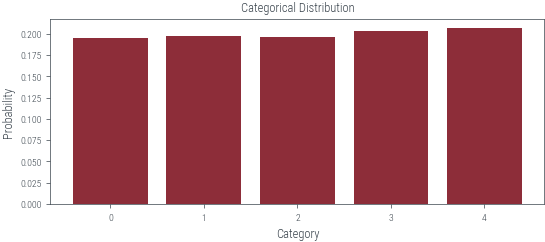

In [38]:
random_numbers = uniform_to_categorical(seed, n_samples, 5)

# Count the occurrences of each category
category_counts = torch.bincount(random_numbers)
print(category_counts)
# Compute the probabilities
probabilities = category_counts.int() / random_numbers.size(0)
print(probabilities)
# Plot the categories with probabilities
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Categorical Distribution')
plt.show()

### Uniform to Normal sampling

***Box Muller Method***

In [17]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

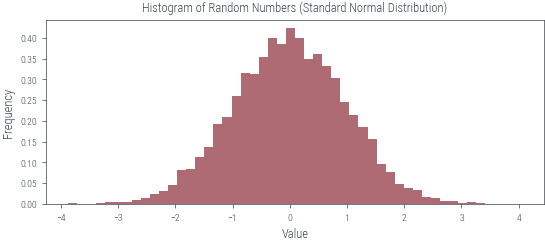

In [39]:
random_numbers = uniform_to_normal_boxmuller(10000)

# Plot the histogram of random numbers
plt.hist(random_numbers, bins=50, density=True, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers (Standard Normal Distribution)')
plt.show()